In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# pip install tensorflow_addons tensorflow_text

In [ ]:
#import tensorflow_addons as tfa

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
# path = "/home/vijay/Desktop/IISC/Sem 3/DL_NLP/A4/embedding_glove.pkl"
path = "/content/drive/MyDrive/DLNLP_A4/"

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [ ]:
# import tensorflow_text as tf_text

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DLNLP_A4/data/TrainData.csv")

In [ ]:
data.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [ ]:
data.iloc[934]

Text        connors  rallying cry for british tennis  do y...
Category                                                sport
Name: 934, dtype: object

In [ ]:
# inp = data["Text"]
op = data["Category"]

In [ ]:
# BUFFER_SIZE = len(inp)
# BATCH_SIZE = 64

# dataset = tf.data.Dataset.from_tensor_slices((inp, op)).shuffle(BUFFER_SIZE)
# dataset = dataset.batch(BATCH_SIZE)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
# def cal_size(text):
#     return  len(text.split())

# lns = data["Text"].apply(cal_size)
# ln=max(lns)
# print(f"Before max doc length {ln}")
# lns.describe(percentiles=[.25, .5, .75,0.90,0.95,0.98])

Before max doc length 3345


count    1490.000000
mean      385.012752
std       210.898616
min        90.000000
25%       253.000000
50%       337.000000
75%       468.750000
90%       630.000000
95%       732.000000
98%       850.320000
max      3345.000000
Name: Text, dtype: float64

In [ ]:
# plt.plot(lns)
# plt.show()

In [ ]:
# def unique(text):
#     return  set(text.split())

# sets = data["Text"].apply(unique)

# sts =set()
# for i in sets:
#     sts.update(i)
# print(f"Before: max unique words {len(sts)}")

In [ ]:
# def unique1(text):
#     text = text.numpy()
#     return set(text.split())

In [ ]:
# prepo = data["Text"].apply(text_preprocessing)
# asets = prepo.apply(unique1)
# asts =set()
# for i in asets:
#     asts.update(i)
# print(f"After: max unique words {len(asts)}")

In [ ]:
# def cal_size2(text):
#     text = text.numpy()
#     return  len(text.split())

In [ ]:
# alns = prepo.apply(cal_size2)
# aln=max(alns)
# print(f"Before max doc length {aln}")
# alns.describe(percentiles=[.25, .5, .75,0.90,0.98])

In [ ]:
# alns.plot()

In [ ]:
# del alns,lns, prepo,sts,asts,sets,asets
# import gc
# gc.collect()

In [ ]:
op.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [ ]:
dct_tr = {'business':0, 'tech':1, 'politics':2, 'sport':3, 'entertainment':4}


In [ ]:
con_tr = op.map(dct_tr)

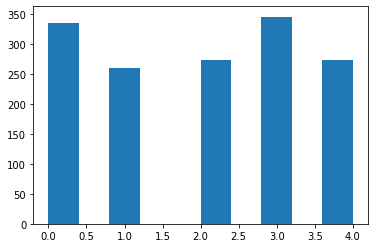

In [ ]:
plt.hist(con_tr)
plt.show()

In [ ]:
pip install autocorrect 

     |████████████████████████████████| 622 kB 12.3 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.5.0-py3-none-any.whl size=621851 sha256=2692f591e47d1904f8c61d22d0fcb104d9b325a81b30b1c5d34a732418e9b41a
  Stored in directory: /root/.cache/pip/wheels/3d/8e/bd/f6fd900a056a031bf710a00bca338d86f43b83f0c25ab5242f
Successfully built autocorrect


In [ ]:
from autocorrect import Speller

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# path2 = "/home/vijay/Desktop/IISC/Sem 3/DL_NLP/A4/"

In [ ]:
def text_preprocessing2(text):
    
    lemmatizer = WordNetLemmatizer()
    
    
    CONTRACTIONS = pickle.load(open("/content/drive/MyDrive/DLNLP_A4/contractions.pkl","rb"))
    
    text = text.split()
#     print(text)
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if (word not in STOPWORDS)]
    
    text = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in text]
    
    text =" ".join([word for word in text])
        
#     text = tf_text.normalize_utf8(text,'NFKD')
    #lowercase
    text =text.lower()
    REPLACE_BY_SPACE_RE = re.compile('\([^()]*\)')
    text = re.sub(REPLACE_BY_SPACE_RE," ",text)
    text = text.split()
    tmp = []
    chars = [str(i) for i in range(11)]
    for word in text:
#         word = word.strip()
        if(len(word)<=2):
            if ("£" in word):
                tmp.append("$")
            
            if ("$" in word):
                tmp.append("$")
        

        if(len(word)>2):
            fl = False
            for cr in chars:
                if cr in word and not (("£" in word) or ("$" in word)):
                    fl = True
            if not fl:
                if ("£" in word):
                    tmp.append("$")
                elif ("$" in word):
                    tmp.append("$")
                else:
                    tmp.append(word)

    text = " ".join([word for word in tmp ])

    return text

In [ ]:
ip = data["Text"].apply(text_preprocessing2)

In [ ]:
# def unique(text):
#     return  set(text.split())

# sets = ip.apply(unique)
# # print(sets)
# sts =set()
# for i in sets:
#     for j in list(i):
#         if(len(j)<=2):
#             print(j,end=", ")
#     sts.update(i)
# print(f"Before: max unique words {len(sts)}")
# del sts,sets

In [ ]:
# path2 = "/content/drive/MyDrive/DLNLP_A4/"

In [ ]:
sent_len = 850

In [ ]:
def tf_lower_and_split_punct(text):
  # Split accecented characters.
#     text = tf_text.normalize_utf8(text, 'NFKD')
    text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
    text = tf.strings.regex_replace(text, '[^ a-z0-9.$,]', '')
  # Add spaces around punctuation.
    text = tf.strings.regex_replace(text, '[.?!,$]', r' \0 ')
  # Strip whitespace.
    text = tf.strings.strip(text)

    text = tf.strings.join([text], separator=' ')
    return text

In [ ]:
max_vocab_size = 23732

input_text_processor = preprocessing.TextVectorization(max_tokens=max_vocab_size,
                                                       output_sequence_length=sent_len,
                                                       standardize = tf_lower_and_split_punct)

input_text_processor.adapt(ip)

# Here are the first 10 words from the vocabulary:
input_text_processor.get_vocabulary()[:10]

['', '[UNK]', '.', 'said', 'would', 'year', 'also', 'new', 'people', '$']

In [ ]:
voc = input_text_processor.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
# cnt = 0
# for i in voc:
#     if len(i)<=2:
#         cnt += 1
        
#         if(i.isdigit()):
#             print(f"\n{i} is digit")
#         else:
#             print(i,end=", ")
# print(f"length of words with <= 2: {cnt}")

In [ ]:
# path_glove = "/home/vijay/Desktop/IISC/Sem 3/DL_NLP/A4/pretrained/glove.840B.300d.txt"

In [ ]:


# embeddings_index = {}
# with open(path_glove) as f:
#     for line in f:
#         word, coefs = line.split(maxsplit=1)
#         coefs = np.fromstring(coefs, "f", sep=" ")
#         embeddings_index[word] = coefs

# print("Found %s word vectors." % len(embeddings_index))

<ipython-input-226-4f0b72b4b2d8>:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  coefs = np.fromstring(coefs, "f", sep=" ")


Found 2195885 word vectors.


In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 300
hits = 0
misses = 0

# # Prepare embedding matrix
# embedding_matrix_gl = np.zeros((num_tokens, embedding_dim))

In [ ]:
num_tokens

23732

In [ ]:
# embedding_matrix_gl.shape

In [ ]:
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
    
#     if embedding_vector is not None and len(embedding_vector)>0:
#         assert(embedding_matrix_gl[i].shape==embedding_vector.shape)
        
#         # Words not found in embedding index will be all-zeros.
#         # This includes the representation for "padding" and "OOV"
#         embedding_matrix_gl[i] = embedding_vector
#         hits += 1
#     else:
# #         print(word)
#         if(i==1 or i==0):
#             continue
#         else:   
#             embedding_matrix_gl[i] = np.random.uniform(-1,1,300)
#         misses += 1
# print("Converted %d words (%d misses)" % (hits, misses))

Converted 20813 words (2915 misses)


In [ ]:
# del data,embedding_vector,embedding_matrix_gl
# import gc
# gc.collect()

In [ ]:
# path

In [ ]:
# pickle.dump(embedding_matrix_gl,open("embedding_glove2.pkl","wb"))

In [ ]:
embedding_matrix_gl = pickle.load(open(path+"embedding_glove2.pkl","rb"))

In [ ]:
# embedding_matrix_gl = pickle.load(open("/content/drive/MyDrive/DLNLP_A4/saved_embeddings/emb_glove.pkl","rb"))


In [ ]:
embedding_matrix_gl.shape

(23732, 300)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding,LSTM, GRU,Dropout,Bidirectional,Dense
from tensorflow.keras.layers import Conv2D
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [ ]:
# X_tr,X_vl,y_tr,y_vl = train_test_split(ip,con_tr,random_state=44,test_size=0.2)

In [ ]:
plt.hist(y_tr)
plt.hist(y_vl)

NameError: ignored

# Done preprocessing

In [ ]:
x_train = input_text_processor(np.array([[s] for s in ip])).numpy()
# x_val = input_text_processor(np.array([[s] for s in con_tr])).numpy()
y_train = np.array(con_tr)
# y_val = np.array(y_vl)

In [ ]:
del data,op,ip

In [ ]:
# X_tr,X_vl,y_tr,y_vl = train_test_split(ip,con_tr,random_state=44,test_size=0.2)

In [ ]:
del X_tr,X_vl,y_tr,y_vl 

In [ ]:
class_dim = 5

In [ ]:
embedding_matrix_gl.shape

(23732, 300)

In [ ]:
    embedding_layer = Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=keras.initializers.Constant(embedding_matrix_gl),
        trainable=False,
    )
    

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
def a_c_lstm():
    

    input_layer = Input(shape=(sent_len,), dtype=tf.int32)
    
    embedded_sequences = embedding_layer(input_layer)
    embedded_sequences = tf.expand_dims(embedded_sequences, -1)

    convlayer = Conv2D(150, kernel_size = (3,embedding_dim), activation="relu")(embedded_sequences)
    squeeze = tf.squeeze(convlayer, [2])
    layer = LSTM(embedding_dim,return_sequences=True)(squeeze)
    layer = Dropout(0.5)(layer)
    
    
    

    attention = Dense(1, activation="tanh")(layer)

    attention = Flatten()(attention)

    attention = Activation("softmax")(attention)

    attention = RepeatVector(100 * 2)(attention)

    attention = Permute([2,1])(attention)

    
    qc = Multiply()([layer, attention])
    qc = Lambda(lambda xin: K.sum(xin, axis=-2),output_shape=(100 * 2,))(qc)

    output = Dense(class_dim,kernel_regularizer = tf.keras.regularizers.l2(l=0.0001) )(qc)
    
    
    
    model = Model(input_layer, output)
    
    return model

In [ ]:
aclstm_model = a_c_lstm()

In [ ]:
aclstm_model.summary()

In [ ]:
opt = tf.optimizers.Adam(learning_rate= 0.001)
# f1 = tfa.metrics.F1Score(num_classes=class_dim, average="micro")
aclstm_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=opt, metrics=["accuracy"]
)


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = aclstm_model.fit(x_train, y_train, batch_size=32, epochs=30,validation_split=0.20,callbacks=[callback])


Epoch 1/30
38/38 [==============================] - 24s 528ms/step - loss: 0.7531 - accuracy: 0.6904 - val_loss: 0.2911 - val_accuracy: 0.8993
Epoch 2/30
38/38 [==============================] - 19s 506ms/step - loss: 0.1867 - accuracy: 0.9430 - val_loss: 0.1537 - val_accuracy: 0.9597
Epoch 3/30
38/38 [==============================] - 19s 506ms/step - loss: 0.1230 - accuracy: 0.9597 - val_loss: 0.2569 - val_accuracy: 0.9161
Epoch 4/30
38/38 [==============================] - 19s 505ms/step - loss: 0.1088 - accuracy: 0.9681 - val_loss: 0.1696 - val_accuracy: 0.9497
Epoch 5/30
38/38 [==============================] - 19s 506ms/step - loss: 0.1017 - accuracy: 0.9715 - val_loss: 0.1891 - val_accuracy: 0.9430


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
preds = aclstm_model.predict(x_val)
conv_pred = np.argmax(preds,axis=1)
f1_score(conv_pred,y_val,average="micro")

0.9765100671140939

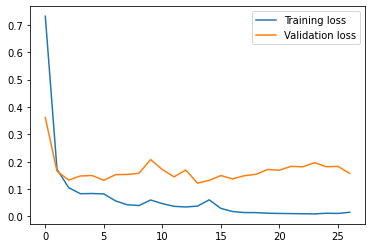

In [ ]:
trloss = history.history["loss"]
vlloss = history.history["val_loss"]
plt.plot(trloss,label="Training loss")
plt.plot(vlloss,label="Validation loss")
plt.legend()
# plt.savefig(path+"atten_model_plots.jpg")
plt.show()

In [ ]:
tf.keras.models.save_model(aclstm_model,path+"att_model_3")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DLNLP_A4/att_model_3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DLNLP_A4/att_model_3/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Testing phase

In [ ]:
import pickle
# x_test = pickle.load(open(path+"x_testv.pkl","rb"))

In [ ]:
def get_testpreds(clstm_model):
  labels = pd.read_excel("/content/drive/MyDrive/DLNLP_A4/Assignment4_TestLabels.xlsx")
  labels["Category"] = labels["Label - (business, tech, politics, sport, entertainment)"]
  dct_tr = {'business':0, 'tech':1, 'politics':2, 'sport':3, 'entertainment':4}
  y_ts = labels["Category"].map(dct_tr)
  # x_test = labels["Text"]
  # x_test = input_text_processor(np.array([[s] for s in x_test])).numpy()
  x_test = pickle.load(open("/content/drive/MyDrive/DLNLP_A4/x_testv.pkl","rb"))
  y_test = np.array(y_ts)
  t_preds = clstm_model.predict([x_test])
  t_conv_pred = np.argmax(t_preds,axis=1)
  return f1_score(t_conv_pred,y_test,average="micro")

In [ ]:
aclstm_model = tf.keras.models.load_model(path+"att_model_3")

In [ ]:
get_testpreds(aclstm_model)

0.9564625850340136

In [ ]:
labels = pd.read_csv(path+"TestData_Labels.csv")

In [ ]:
dct_tr

{'business': 0, 'entertainment': 4, 'politics': 2, 'sport': 3, 'tech': 1}

In [ ]:
y_ts = labels["Category"].map(dct_tr)

In [ ]:
y_ts

0      3
1      1
2      0
3      4
4      2
      ..
730    3
731    1
732    0
733    4
734    2
Name: Category, Length: 735, dtype: int64

In [ ]:
aclstm_model =  tf.keras.models.load_model("/content/drive/MyDrive/DLNLP_A4/att_model1")

In [ ]:
t_preds = aclstm_model.predict(x_test)
#t_conv_pred = np.argmax(t_preds,axis=1)
#f1_score(t_conv_pred,y_ts,average="micro")


In [ ]:

t_conv_pred = np.argmax(t_preds,axis=1)

In [ ]:
ipd =  pd.read_csv("/content/drive/MyDrive/DLNLP_A4/TestData_Inputs.csv")["ArticleId"]

In [ ]:
ipd

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [ ]:
inv =  {v:k for k,v in dct_tr.items()} 

In [ ]:
t_preds

array([[-0.21909758, -2.8430414 , -0.13924527,  3.307326  , -0.39263535],
       [-0.2846051 ,  5.2536945 , -1.617315  , -2.9618568 , -0.6304085 ],
       [-1.0160826 , -2.878162  , -1.3332143 ,  5.3708863 , -0.29848713],
       ...,
       [ 1.963243  ,  2.868113  , -1.140618  , -1.6259068 , -1.8854735 ],
       [ 4.2882247 , -0.64717036, -0.11049239, -0.944316  , -2.5726454 ],
       [-1.4399902 , -2.8337805 ,  6.279981  , -2.2967784 , -0.6904985 ]],
      dtype=float32)

In [ ]:
ipd

0      1018
1      1319
2      1138
3       459
4      1020
       ... 
730    1923
731     373
732    1704
733     206
734     471
Name: ArticleId, Length: 735, dtype: int64

In [ ]:
ops = pd.DataFrame({"ArticleId":np.array(ipd),"Category":t_conv_pred})

In [ ]:
ops["Category"] = ops["Category"].map(inv)

In [ ]:
ops.to_csv(path+"Submission.csv",index=False)